In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load the Excel file
file_path = 'full.xlsx'
df = pd.read_excel(file_path)

In [4]:
# Load the Excel file with the column names, skipping the first row
file_path = 'Variables.xlsx'
df_columns = pd.read_excel(file_path, skiprows=1)
df_columns

,#,Variable,Type,Len,Format,Informat,Label
0,1,A00,Num,8,BEST.,NaN,Identifiant PASSATION
1,2,A01,Num,8,BEST.,NaN,Identifiant INDIVIDU
2,3,Q01,Num,8,BEST.,NaN,Année de naissance
3,4,Q02,Num,8,BEST.,NaN,Mois de naissance
4,5,Q03,Num,8,BEST.,NaN,Sexe
...,...,...,...,...,...,...,...
349,350,q44nb_vie,Num,8,NaN,NaN,Nombre d'illicites vie (SANS cannabis)
350,351,q44ill_ann,Num,8,NaN,NaN,Au moins un illicite année (SANS cannabis)
351,352,q44ill_age,Num,8,NaN,NaN,Age expérimentation premier illicite (SANS can...
352,353,q46vie,Num,8,NaN,NaN,Déjà pris une drogue sans savoir ce que c'étai...


In [ ]:
df.head()

,A00,A01,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,...,q45a_dmt,q45a_hal,q45a_sti,q45a_snu,q44ill_vie,q44nb_vie,q44ill_ann,q44ill_age,q46vie,FIES_score
0,3,69,2004,4.0,1.0,1.0,3.0,NaN,2.0,1.0,...,0,0,0,0,1.0,8.0,1.0,6.0,1.0,NaN
1,7,210,2004,11.0,1.0,1.0,2.0,NaN,1.0,2.0,...,0,0,0,0,0.0,0.0,0.0,NaN,0.0,NaN
2,12,379,2004,11.0,1.0,NaN,NaN,4.0,NaN,1.0,...,0,0,0,0,NaN,NaN,0.0,NaN,0.0,NaN
3,12,388,2005,1.0,1.0,NaN,3.0,NaN,2.0,2.0,...,0,0,0,0,0.0,0.0,0.0,NaN,0.0,8.0
4,18,559,2004,11.0,1.0,1.0,2.0,NaN,1.0,1.0,...,0,0,0,0,0.0,0.0,0.0,NaN,0.0,NaN


In [ ]:
print(len(df))

22430


In [ ]:
# Replace null values with 0 for Q38
df['Q38'] = df['Q38'].fillna(0)

# Percentage of each answer to Q38
print(df['Q38'].value_counts(normalize=True))

Q38
1.0    0.701159
2.0    0.287784
0.0    0.011057
Name: proportion, dtype: float64


In [ ]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

A00               0
A01               0
Q01               0
Q02             183
Q03             104
              ...  
q44nb_vie       737
q44ill_ann      531
q44ill_age    21717
q46vie          414
FIES_score    15427
Length: 354, dtype: int64


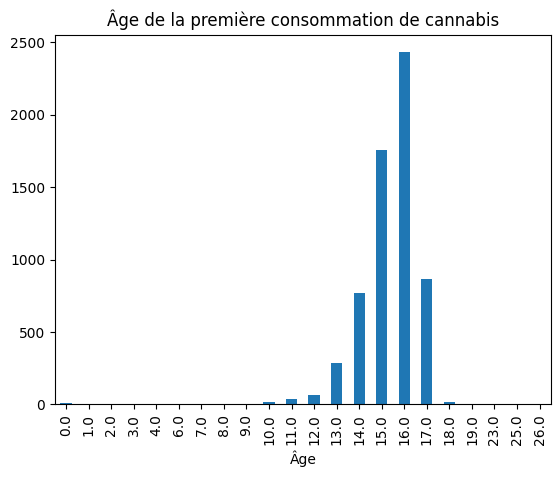

In [ ]:
# Count of each unique value in the column Q38A
count = df['Q38A'].value_counts()

# Convert the unique values to integers
count = count.astype(int)

# Sort the values by the index
count = count.sort_index()

# Plot the count of each unique value in the column Q38A
count.plot(kind='bar')
plt.title('Âge de la première consommation de cannabis')
plt.xlabel('Âge')
plt.show()

In [ ]:
# Calculate the proportion of missing values in the Q38A column
missing_values = df['Q38A'].isnull().sum()
print(100 * missing_values / len(df['Q38A']))

72.0196165849309


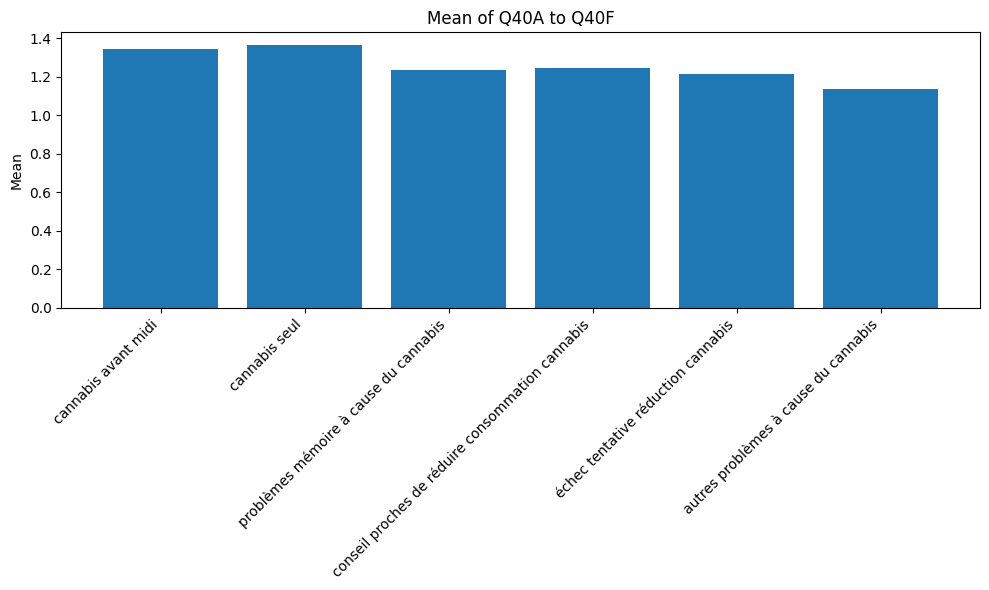

In [ ]:
means = df[['Q40A', 'Q40B', 'Q40C', 'Q40D', 'Q40E', 'Q40F']].mean()

# Join the means with the column names from df_columns
means = means.to_frame().reset_index()
means.columns = ['Question', 'Mean']
means = means.merge(df_columns, left_on='Question', right_on='Variable')

# Plot the means
plt.figure(figsize=(10, 6))
plt.bar(means['Label'], means['Mean'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean')
plt.title('Mean of Q40A to Q40F')
plt.tight_layout()
plt.show()



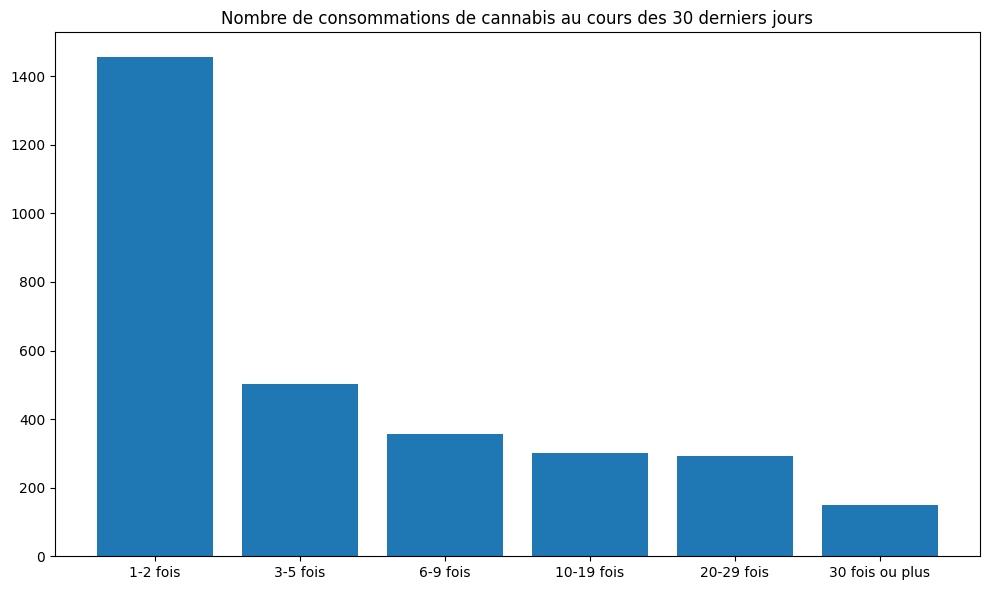

In [ ]:
# Count of each unique value in the Q42 column
value_counts = df['Q42'].value_counts()

# Remove answer "1"
value_counts = value_counts.drop(1)

# Rename the index to the corresponding labels
value_counts.index = ['1-2 fois', '3-5 fois', '6-9 fois', '10-19 fois', '20-29 fois', '30 fois ou plus']

# Plot the value counts
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values)
plt.title('Nombre de consommations de cannabis au cours des 30 derniers jours')
plt.tight_layout()
plt.show()

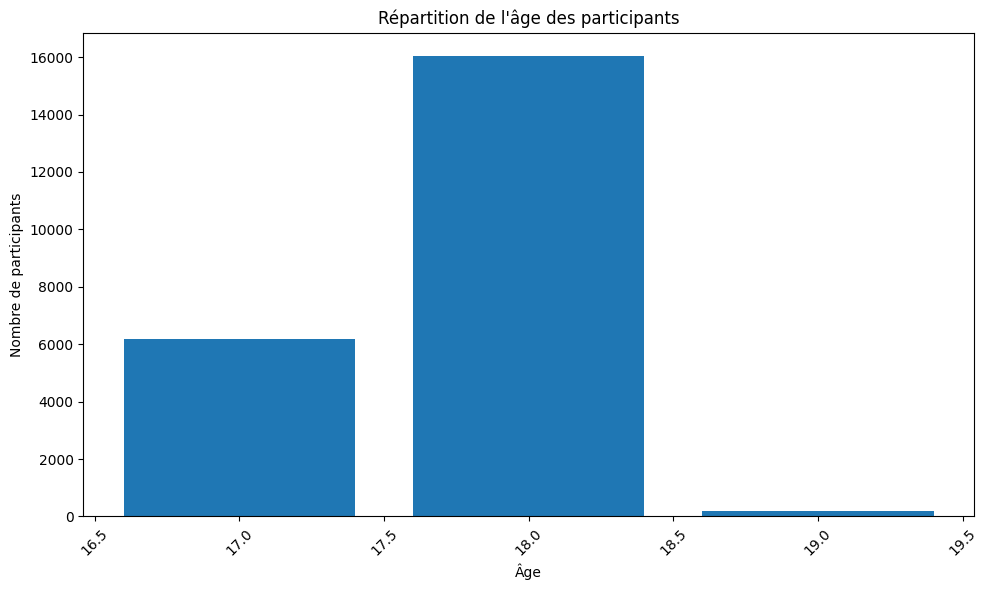

In [ ]:
# Répartition de l'age des participants (Q01: année de naissance)
age_counts = df['agea'].value_counts()

# Plot a bar chart of the age distribution (17, 18 and 19 years old)
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values)
plt.title('Répartition de l\'âge des participants')
plt.xlabel('Âge')
plt.ylabel('Nombre de participants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

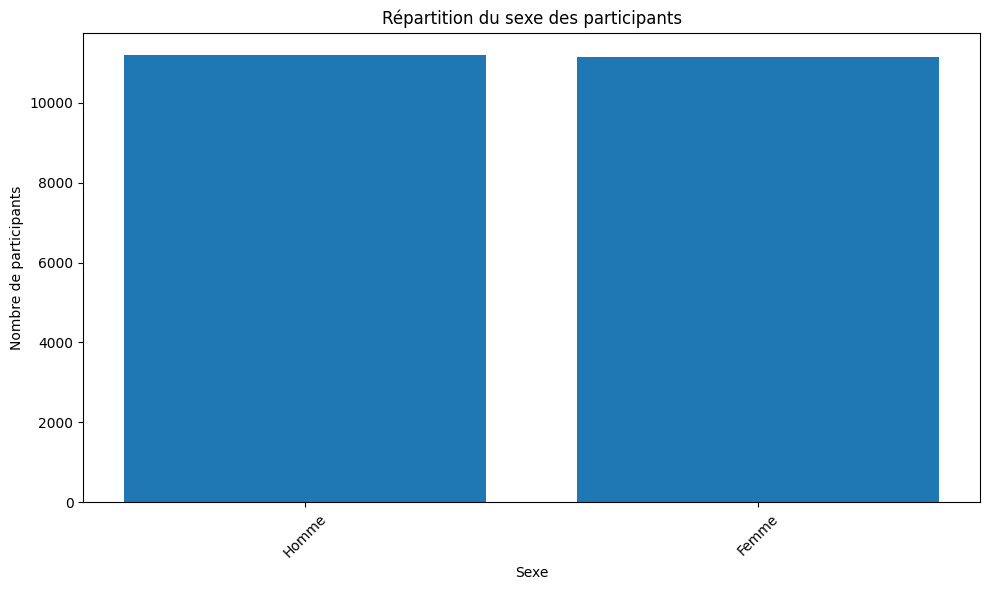

In [ ]:
# Répartition du sexe des participants (Q03: sexe, 1 = homme, 2 = femme)
sexe_counts = df['Q03'].value_counts()

# Rename the index to the corresponding labels
sexe_counts.index = ['Homme', 'Femme']

# Plot the value counts in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sexe_counts.index, sexe_counts.values)
plt.title('Répartition du sexe des participants')
plt.xlabel('Sexe')
plt.ylabel('Nombre de participants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

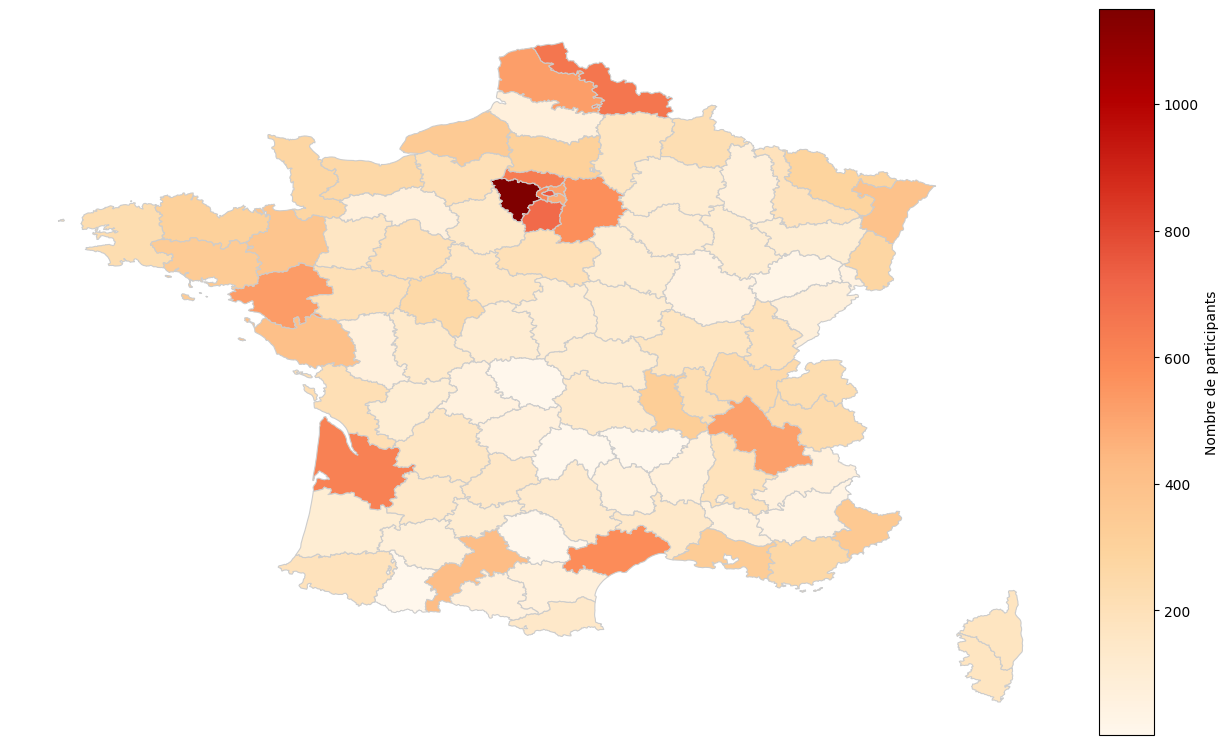

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the shapefile of French departments
shapefile_path = './departements.shp'
gdf = gpd.read_file(shapefile_path)

# Analyse des départements d'origine (Q09: département)
departement_counts = df['Q09'].value_counts()

# Clean the 'dep_code' column to ensure it only contains numeric values
gdf['dep_code'] = gdf['dep_code'].str.extract('(\d+)').astype(float)

# Merge the department counts with the shapefile
gdf = gdf.merge(departement_counts, left_on='dep_code', right_index=True, how='left')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

gdf.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax,
         legend_kwds={'label': "Nombre de participants", 'orientation': "vertical"})

# Remove axis
ax.axis('off')

plt.show()

In [ ]:
# Create a mapping of old column names to new column names
column_mapping = dict(zip(df_columns['Variable'], df_columns['Label']))

# Add description for each column in the DataFrame
df.attrs['description'] = column_mapping

for column, description in df.attrs['description'].items():
    print(f"{column}: {description}")

A00: Identifiant PASSATION
A01: Identifiant INDIVIDU
Q01: Année de naissance
Q02: Mois de naissance
Q03: Sexe
Q04: Situation
Q05: Situation scolaire
Q06: Situation professionnelle
Q07: Redoublement
Q08: Difficultés pour lire/écrire le français
Q09: Département
Q12: Lieu de vie
Q12B: Autre lieu de vie (précision)
Q13A01: Vie avec père
Q13A02: Vie avec mère
Q13A03: Vie avec frère ou sœur
Q13A04: Vie avec demi frère ou sœur
Q13A05: Vie avec beau père et/ou belle mère
Q13A06: Vie avec autres membres de la famille
Q13A07: Vie avec petit(e) ami(e) / conjoint(e)
Q13A08: Autres (ami, colocataire)
Q16A: Voitures de la famille
Q16B: Chambre seul
Q16C: Voyage en famille dans l'année
Q16D: Ordinateur de la famille
Q16E: Lave-vaiselle
Q16F: Nombre de salles-de-bain
Q17: Etat de santé
Q18: Taille
Q19: Poids
Q20: Fréquence hebdomadaire activité sportive
Q21A: Vu un médecin
Q21B: Vu un dentiste
Q21C: Eu un problème de santé
Q21D: Eu un problème dentaire
Q21E: Consulter un psychologue
Q22A: ADRS pas d'

In [ ]:
# Calculate the number of non-responses (NaN values) for each question
non_responses = df.isnull().sum()

# Convert to a DataFrame for better readability
non_responses_df = non_responses.reset_index()
non_responses_df.columns = ['Question', 'NonResponses']

# Add the description of each question
non_responses_df['Description'] = non_responses_df['Question'].map(df.attrs['description'])

# Sort by the number of non-responses in descending order
non_responses_df = non_responses_df.sort_values(by='NonResponses', ascending=False)

# Display the top 10 questions with the most non-responses
non_responses_df.where((non_responses_df['NonResponses'] > 0)).dropna().head(30)

,Question,NonResponses,Description
307,q44h2r,22421.0,Age mop (recodé)
120,Q44H2,22414.0,âge 1e mop
306,q44g2r,22373.0,Age crack (recodé)
117,Q44G2,22365.0,âge 1e crack
309,q44j2r,22363.0,Age héroïne (recodé)
126,Q44J2,22354.0,âge 1e héroïne
12,Q12B,22280.0,Autre lieu de vie (précision)
304,q44e2r,22273.0,Age amphétamines (recodé)
111,Q44E2,22266.0,"âge 1e amphétamines, speed"
312,q44m2r,22249.0,Age kétamine (recodé)


In [ ]:
print(df[['CAST_cat', 'ECO', 'FIES_score']])

       CAST_cat  ECO  FIES_score
0           3.0  3.0         NaN
1           0.0  NaN         NaN
2           0.0  2.0         NaN
3           0.0  1.0         8.0
4           0.0  1.0         NaN
...         ...  ...         ...
22425       0.0  1.0         8.0
22426       0.0  0.0         NaN
22427       0.0  0.0         8.0
22428       0.0  3.0         9.0
22429       0.0  1.0         NaN

[22430 rows x 3 columns]


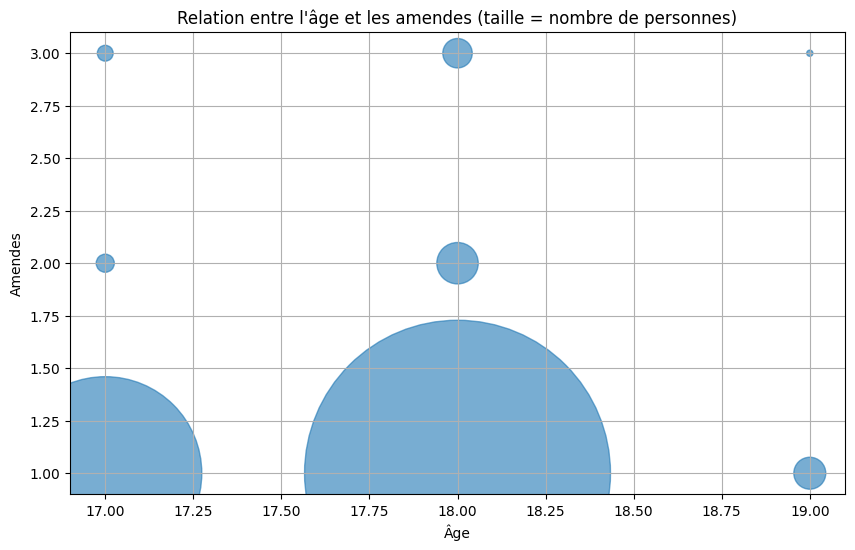

In [ ]:
if 'QC09' in df.columns:
    # Création d'une table de fréquence pour chaque couple (age, QC09)
    grouped = df.groupby(['agea', 'QC09']).size().reset_index(name='count')

    # Affichage
    plt.figure(figsize=(10, 6))
    plt.scatter(grouped['agea'], grouped['QC09'], s=grouped['count'] * 10, alpha=0.6)
    plt.title("Relation entre l'âge et les amendes (taille = nombre de personnes)")
    plt.xlabel("Âge")
    plt.ylabel("Amendes")
    plt.grid(True)
    plt.show()
else:
    print("La colonne des amendes (QC09) n'existe pas dans le DataFrame.")

In [ ]:
df_valid = df.dropna(subset=["agea", "QC09"])
corr_ponderee = (
    lambda x, y: pd.Series(x).corr(pd.Series(y), method='pearson')  # approximation
)
print("Corrélation brute :", df["agea"].corr(df["QC09"]))

Corrélation brute : 0.031677583239151395


QC07 : Avoir fait l'objet d'un contrôle d'identité dans la rue
QC08 : Avoir fait l'objet d'un contrôle d'identité en voiture/deux-roues
QC09 : Avoir fait l'objet d'un contrôle d'identité pour consommation de cannabis
QC10 : Avoir reçu une amende pour consommation de cannabis
ECO : Situation Socioéconomique des parents en 5 classes
CAST_cat : CAST en 4 catégories
FIES_score : Score à la Food Insecurity Experience Scale


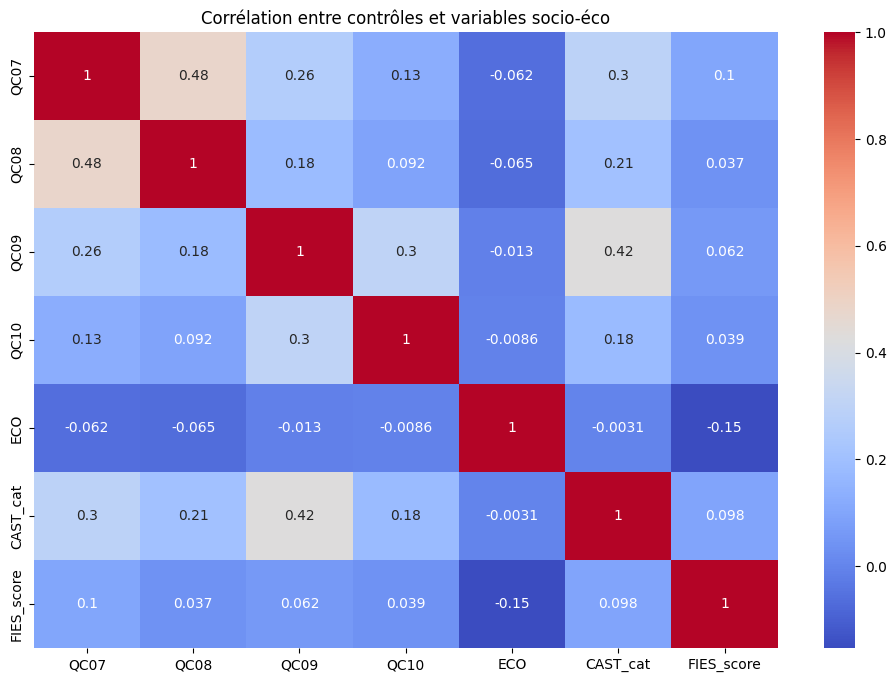

In [ ]:
import seaborn as sns

# Variables à analyser
controle_vars = ["QC07", "QC08", "QC09", "QC10"]
socio_vars = ["ECO", "CAST_cat", "FIES_score"]

# Affichage des descriptions des colonnes
for var in controle_vars + socio_vars:
    if var in df.columns:
        print(f"{var} : " + df.attrs['description'].get(var, f"Aucune description pour {var}"))

# Exemple : heatmap de corrélations
plt.figure(figsize=(12, 8))
sns.heatmap(df[controle_vars + socio_vars].corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation entre contrôles et variables socio-éco")
plt.show()

On remarque que le score ECO est peu corrélé avec les variables d'intérêt. A l'inverse, le score CASTest très corrélé positivement avec les variables d'intérêt.

Le score FIES est corrélé positivement avec la question QC07 qui est "Avoir fait l'objet d'un contrôle d'identité dans la rue".

In [ ]:
from scipy.stats import pearsonr

for var1 in controle_vars:
    for var2 in socio_vars:
        x = df[var1]
        y = df[var2]
        valid = df[[var1, var2]].dropna()
        if len(valid) > 2:
            r, pval = pearsonr(valid[var1], valid[var2])
            print(f"Corrélation entre {var1} et {var2} : r = {r:.3f}, p = {pval:.4f}")


Corrélation entre QC07 et ECO : r = -0.062, p = 0.0000
Corrélation entre QC07 et CAST_cat : r = 0.297, p = 0.0000
Corrélation entre QC07 et FIES_score : r = 0.102, p = 0.0000
Corrélation entre QC08 et ECO : r = -0.065, p = 0.0000
Corrélation entre QC08 et CAST_cat : r = 0.206, p = 0.0000
Corrélation entre QC08 et FIES_score : r = 0.037, p = 0.0026
Corrélation entre QC09 et ECO : r = -0.013, p = 0.2905
Corrélation entre QC09 et CAST_cat : r = 0.424, p = 0.0000
Corrélation entre QC09 et FIES_score : r = 0.062, p = 0.0000
Corrélation entre QC10 et ECO : r = -0.009, p = 0.4753
Corrélation entre QC10 et CAST_cat : r = 0.175, p = 0.0000
Corrélation entre QC10 et FIES_score : r = 0.039, p = 0.0016


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA : effet du statut CAST_cat sur le nombre d'amendes QC09
model = ols("QC09 ~ C(CAST_cat)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                 sum_sq      df           F  PR(>F)
C(CAST_cat)   68.216557     3.0  613.054739     0.0
Residual     255.001062  6875.0         NaN     NaN


In [ ]:
import statsmodels.formula.api as smf

# Créer une version binaire propre
df_clean = df.copy()
df_clean = df_clean[df_clean["QC07"].isin([1, 2])]
df_clean["QC07_bin"] = df_clean["QC07"].map({1: 1, 2: 0})


# On suppose que QC07 est binaire (0/1)
model = smf.logit("QC07_bin ~ C(ECO) + C(CAST_cat) + C(FIES_score)", data=df_clean).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.382475
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               QC07_bin   No. Observations:                 5903
Model:                          Logit   Df Residuals:                     5887
Method:                           MLE   Df Model:                           15
Date:                Thu, 15 May 2025   Pseudo R-squ.:                 0.02905
Time:                        16:28:06   Log-Likelihood:                -2257.7
converged:                       True   LL-Null:                       -2325.3
Covariance Type:            nonrobust   LLR p-value:                 2.105e-21
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.8382      0.212      8.666      0.000       1.423       2.

Optimization terminated successfully.
         Current function value: 0.383703
         Iterations 6


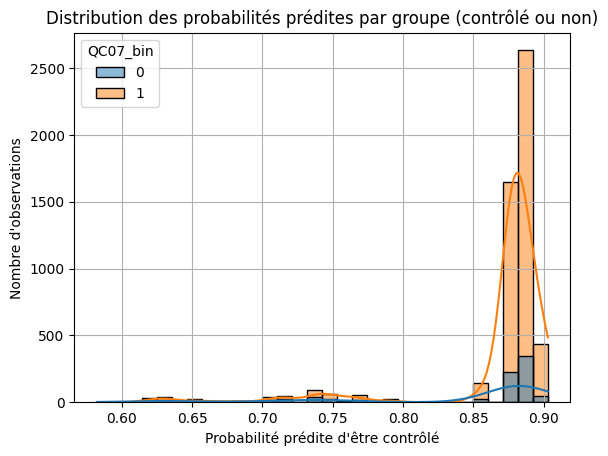

In [ ]:
# Recréer exactement le DataFrame utilisé par le modèle
vars_used = ["QC07_bin", "ECO", "CAST_cat"]
df_model = df_clean[vars_used].dropna()
df_model["QC07_bin"] = df_model["QC07_bin"].astype(int)

# Réentraîne le modèle avec ces lignes (même échantillon)
model = smf.logit("QC07_bin ~ C(ECO) + C(CAST_cat)", data=df_model).fit()

# Prédictions
df_model["predicted_prob"] = model.predict()

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_model, x="predicted_prob", hue="QC07_bin", kde=True, bins=30)
plt.title("Distribution des probabilités prédites par groupe (contrôlé ou non)")
plt.xlabel("Probabilité prédite d'être contrôlé")
plt.ylabel("Nombre d'observations")
plt.grid(True)
plt.show()

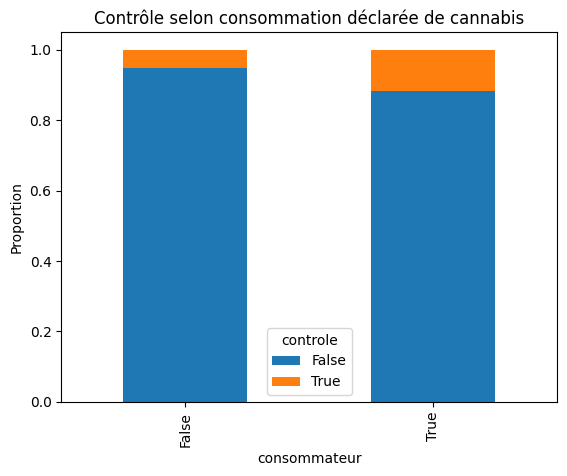

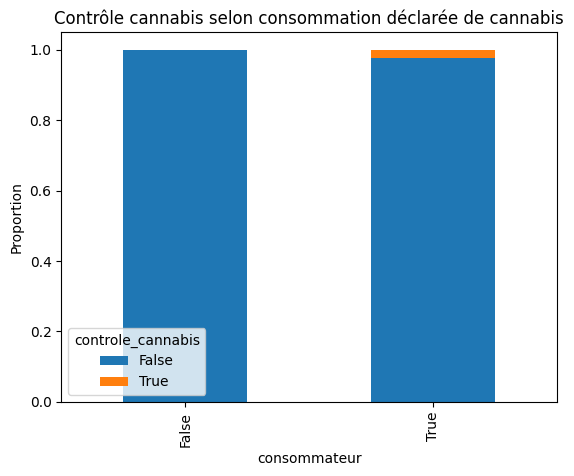

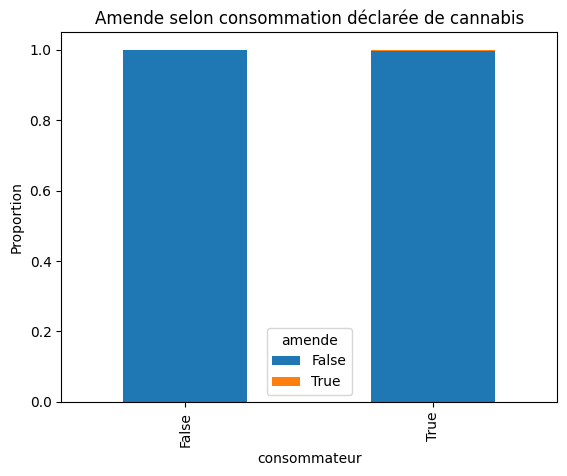

In [ ]:
# Suppose que q39r = consommation de cannabis ; QC07 = a été contrôlé ; QC09 = a été controlé pour cannabis ; QC10 = a reçu une amende
df["consommateur"] = df["q38vie"] == 1
df["controle"] = df["QC07"] > 1
df["controle_cannabis"] = df["QC09"] > 1
df["amende"] = df["QC10"] == 2

# Taux de contrôle selon consommation
table = pd.crosstab(df["consommateur"], df["controle"], normalize="index")
table.plot(kind="bar", stacked=True)
plt.title("Contrôle selon consommation déclarée de cannabis")
plt.ylabel("Proportion")
plt.show()

# Taux de contrôle cannabis selon consommation
table = pd.crosstab(df["consommateur"], df["controle_cannabis"], normalize="index")
table.plot(kind="bar", stacked=True)
plt.title("Contrôle cannabis selon consommation déclarée de cannabis")
plt.ylabel("Proportion")
plt.show()

# Taux d'amende selon consommation
table = pd.crosstab(df["consommateur"], df["amende"], normalize="index")
table.plot(kind="bar", stacked=True)
plt.title("Amende selon consommation déclarée de cannabis")
plt.ylabel("Proportion")
plt.show()

In [ ]:
# ## 5. Comparaison non-réponse cannabis / tabac

non_reponse_cannabis = df["q38vie"].isna().mean()
non_reponse_tabac = df["q26paq_vie"].isna().mean()

print(f"Taux de non-réponse cannabis : {non_reponse_cannabis:.2%}")
print(f"Taux de non-réponse tabac : {non_reponse_tabac:.2%}")


Taux de non-réponse cannabis : 0.90%
Taux de non-réponse tabac : 0.83%


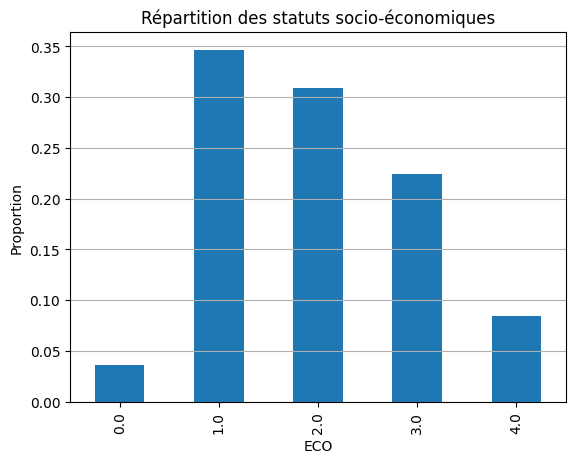

In [ ]:
# ## 7. Amélioration des visualisations

# Exemple de rectangle (barplot) au lieu de camembert
df["ECO"].value_counts(normalize=True).sort_index().plot(kind="bar")
plt.title("Répartition des statuts socio-économiques")
plt.ylabel("Proportion")
plt.grid(axis="y")
plt.show()


In [ ]:
df_copy = df.copy()

# 1. Recode du sexe pour plus de clarté (optionnel)
df_copy['sexe'] = df_copy['Q03'].map({1: 'Homme', 2: 'Femme'})

# 2. Variable binaire : a été contrôlé ou non
df_copy.dropna(subset=['controle'], inplace=True)  # Remove rows where 'controle' is NaN
df_copy['controle'] = df_copy['QC09'].apply(lambda x: 1 if x == 2 else 0)

# 3. Part des personnes contrôlées par sexe
part_controles = df_copy.groupby('sexe')['controle'].mean()

# Affichage des résultats en pourcentage
print((part_controles * 100).round(2).astype(str) + ' %')

# Affichage du nombre de personnes contrôlées par sexe
print(df_copy.groupby('sexe')['controle'].sum())

# Au sein des contrôlés, part des hommes et femmes
part_sexe_controles = df_copy[df_copy['controle'] == 1]['sexe'].value_counts(normalize=True)
# Affichage des résultats en pourcentage
print((part_sexe_controles * 100).round(2).astype(str) + ' %')

sexe
Femme    0.33 %
Homme    0.61 %
Name: controle, dtype: object
sexe
Femme    37
Homme    68
Name: controle, dtype: int64
sexe
Homme    64.76 %
Femme    35.24 %
Name: proportion, dtype: object


In [ ]:
df_copy = df.copy()

# 1. Recode du sexe pour plus de clarté (optionnel)
df_copy['sexe'] = df_copy['Q03'].map({1: 'Homme', 2: 'Femme'})

# Affichage du nombre total d'hommes et de femmes
print(df_copy['sexe'].value_counts())

# 2. Variable binaire : a déjà consommé ou non
df_copy.dropna(subset=['q38vie'], inplace=True)  # Remove rows where 'q38vie' is NaN
df_copy['consommation'] = df_copy['q38vie']

# 3. Part des personnes ayant déjà consommé par sexe
part_consommation = df_copy.groupby('sexe')['consommation'].mean()
# Affichage des résultats en pourcentage
print((part_consommation * 100).round(2).astype(str) + ' %')

# Affichage du nombre total de consommateurs par sexe
print(df_copy[df_copy['consommation'] == 1]['sexe'].value_counts())

# Au sein des consommateurs, part des hommes et femmes
part_sexe_consommation = df_copy[df_copy['consommation'] == 1]['sexe'].value_counts(normalize=True)
# Affichage des résultats en pourcentage
print((part_sexe_consommation * 100).round(2).astype(str) + ' %')

sexe
Femme    11188
Homme    11138
Name: count, dtype: int64
sexe
Femme    27.82 %
Homme    31.67 %
Name: consommation, dtype: object
sexe
Homme    3484
Femme    3095
Name: count, dtype: int64
sexe
Homme    52.96 %
Femme    47.04 %
Name: proportion, dtype: object


In [ ]:
df_copy = df.copy()

# 1. Recode de l'age pour plus de clarté (optionnel)
df_copy['age'] = df_copy['agea'].map({17: '17 ans', 18: '18 ans', 19: '19 ans'})

# 2. Variable binaire : a déjà reçu une amende ou non
df_copy.dropna(subset=['QC10'], inplace=True)  # Remove rows where 'Q10' is NaN
df_copy['amende'] = df_copy['QC10'].apply(lambda x: 1 if x == 2 or x == 3 else 0)

# 3. Part des personnes ayant déjà reçu une amende par âge
part_amende = df_copy.groupby('age')['amende'].mean()
# Affichage des résultats en pourcentage
print((part_amende * 100).round(2).astype(str) + ' %')

# Au sein des personnes ayant déjà reçu une amende, part des âges
part_age_amende = df_copy[df_copy['amende'] == 1]['age'].value_counts(normalize=True)
# Affichage des résultats en pourcentage
print((part_age_amende * 100).round(2).astype(str) + ' %')
# Affichage des résultats en valeurs
print(df_copy[df_copy['amende'] == 1]['age'].value_counts())

age
17 ans    0.46 %
18 ans    0.38 %
19 ans    3.64 %
Name: amende, dtype: object
age
18 ans    63.33 %
17 ans     30.0 %
19 ans     6.67 %
Name: proportion, dtype: object
age
18 ans    19
17 ans     9
19 ans     2
Name: count, dtype: int64


In [ ]:
# On regarde les caractéristiques socio-économiques des personnes mineures ayant déjà été contrôlées
df_copy = df.copy()

# 1. Recode de l'age pour plus de clarté (optionnel)
df_copy['age'] = df_copy['agea'].map({17: '17 ans', 18: '18 ans', 19: '19 ans'})

# 2. Variable binaire : a déjà été contrôlé ou non
df_copy.dropna(subset=['QC09'], inplace=True)  # Remove rows where 'Q10' is NaN
df_copy['amende'] = df_copy['QC09'].apply(lambda x: 1 if x == 2 else 0)

caracteristiques = ['Q03', 'Q04', 'Q07', 'Q08']

# On affiche les statistiques socio-économiques de tous les mineurs
for caracteristique in caracteristiques:
    print(df_copy.attrs['description'].get(caracteristique, f"Aucune description pour {caracteristique}"))
    # Affichage des résultats en pourcentage
    print(df_copy[caracteristique].value_counts(normalize=True).round(2) * 100)
    # Affichage des résultats en valeurs
    print(df_copy[caracteristique].value_counts())
    print("\n")

# 4. On ne garde que les personnes ayant déjà reçu une amende
df_copy = df_copy[df_copy['amende'] == 1]

# 5. On regarde les caractéristiques socio-économiques des personnes mineures ayant déjà reçu une amende
df_copy = df_copy[caracteristiques]

# 6. On affiche les résultats
for caracteristique in caracteristiques:
    print(df_copy.attrs['description'].get(caracteristique, f"Aucune description pour {caracteristique}"))
    # Affichage des résultats en pourcentage
    print(df_copy[caracteristique].value_counts(normalize=True).round(2) * 100)
    # Affichage des résultats en valeurs
    print(df_copy[caracteristique].value_counts())
    print("\n")


Sexe
Q03
2.0    51.0
1.0    49.0
Name: proportion, dtype: float64
Q03
2.0    3556
1.0    3410
Name: count, dtype: int64


Situation
Q04
1.0    97.0
2.0     3.0
Name: proportion, dtype: float64
Q04
1.0    5651
2.0     157
Name: count, dtype: int64


Redoublement
Q07
1.0    84.0
2.0    16.0
Name: proportion, dtype: float64
Q07
1.0    5866
2.0    1088
Name: count, dtype: int64


Difficultés pour lire/écrire le français
Q08
1.0    79.0
2.0    18.0
3.0     3.0
Name: proportion, dtype: float64
Q08
1.0    5511
2.0    1262
3.0     192
Name: count, dtype: int64


Sexe
Q03
1.0    65.0
2.0    35.0
Name: proportion, dtype: float64
Q03
1.0    68
2.0    37
Name: count, dtype: int64


Situation
Q04
1.0    89.0
2.0    11.0
Name: proportion, dtype: float64
Q04
1.0    85
2.0    10
Name: count, dtype: int64


Redoublement
Q07
1.0    81.0
2.0    19.0
Name: proportion, dtype: float64
Q07
1.0    86
2.0    20
Name: count, dtype: int64


Difficultés pour lire/écrire le français
Q08
1.0    79.0
2.0    17.0
3.0

In [ ]:
from scipy.stats import pearsonr

# Corrélation entre âge de première conso (Q38A) et fréquence (Q42)
df_clean = df[['Q38A', 'Q42']].dropna()
corr, p = pearsonr(df_clean['Q38A'], df_clean['Q42'])
print(f"Corrélation: {corr:.2f}, p-value: {p:.4f}")

Corrélation: -0.22, p-value: 0.0000


In [ ]:
import statsmodels.api as sm

X = df[['Q38A', 'Q40A', 'Q40B', 'Q40C']].fillna(0)
y = df['Q42'].fillna(0)
X = sm.add_constant(X)  # ajout de la constante
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Q42   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     6412.
Date:                Thu, 15 May 2025   Prob (F-statistic):               0.00
Time:                        16:28:07   Log-Likelihood:                -25020.
No. Observations:               22430   AIC:                         5.005e+04
Df Residuals:                   22425   BIC:                         5.009e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6782      0.007    103.838      0.0

In [ ]:
X = df[['Q38A', 'Q40A', 'Q40B', 'Q40C', 'Q40D', 'Q40E', 'Q40F']].fillna(0)
y = df['Q42'].fillna(0)
X = sm.add_constant(X)
model_full = sm.OLS(y, X).fit()
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                    Q42   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     3986.
Date:                Thu, 15 May 2025   Prob (F-statistic):               0.00
Time:                        16:28:07   Log-Likelihood:                -24506.
No. Observations:               22430   AIC:                         4.903e+04
Df Residuals:                   22422   BIC:                         4.909e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7209      0.007    110.210      0.0

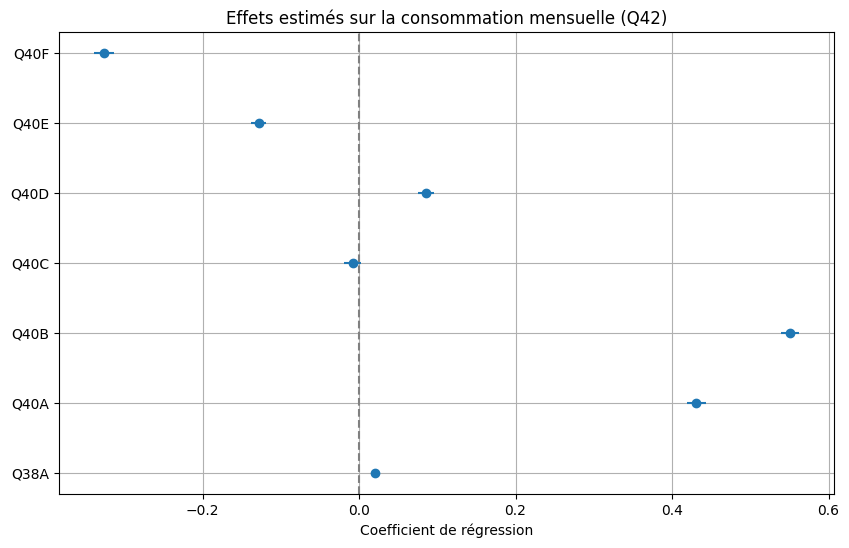

In [ ]:
import matplotlib.pyplot as plt

coef = model_full.params[1:]  # sans l'intercept
errors = model_full.bse[1:]
variables = coef.index

plt.figure(figsize=(10, 6))
plt.errorbar(coef, variables, xerr=errors, fmt='o')
plt.axvline(0, color='grey', linestyle='--')
plt.title("Effets estimés sur la consommation mensuelle (Q42)")
plt.xlabel("Coefficient de régression")
plt.grid(True)
plt.show()


In [ ]:
import statsmodels.api as sm

controle_vars = ["QC10"]
socio_vars = ["ECO", "CAST_cat", "FIES_score"]

X = df[socio_vars].fillna(0)
y = df['QC10'].apply(lambda x: 1 if x == 2 or x == 3 else 0).fillna(0)
X = sm.add_constant(X)  # ajout de la constante
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.007273
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                   QC10   No. Observations:                22430
Model:                          Logit   Df Residuals:                    22426
Method:                           MLE   Df Model:                            3
Date:                Thu, 15 May 2025   Pseudo R-squ.:                  0.2860
Time:                        16:28:07   Log-Likelihood:                -163.13
converged:                       True   LL-Null:                       -228.49
Covariance Type:            nonrobust   LLR p-value:                 3.797e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4028      0.624    -15.074      0.000     -10.625      -8.180
ECO            0.0393      0

In [6]:
import statsmodels.api as sm
controle_vars = ["QC10"]
socio_vars = ["Q13A01","Q13A02","Q13A03","Q13A04","Q13A05","Q13A06","Q13A07","Q13A08"]

X = df[socio_vars].fillna(0)
y = df['QC10'].apply(lambda x: 1 if x == 2 or x == 3 else 0).fillna(0)
X = sm.add_constant(X)  # ajout de la constante
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.009823
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                   QC10   No. Observations:                22430
Model:                          Logit   Df Residuals:                    22421
Method:                           MLE   Df Model:                            8
Date:                Fri, 16 May 2025   Pseudo R-squ.:                 0.03575
Time:                        12:30:40   Log-Likelihood:                -220.32
converged:                       True   LL-Null:                       -228.49
Covariance Type:            nonrobust   LLR p-value:                   0.03779
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0981      0.552    -11.054      0.000      -7.179      -5.017
Q13A01         0.1024      0

Ici, vivre avec frère et soeure (Q13A03) diminue le nombre de contrôle, dû à l'expérience ou exemplarité. 
Par contre, les familles recomposés sont un facteurs plus important, vivre avec demi frère (Q13A04)
Et vivre avec copine/ copain (émancipation) est un facteur important (Q13A07)


In [7]:
controle_vars = ["QC10"]
socio_vars = ["Q13A03","Q13A04","Q13A07"]

X = df[socio_vars].fillna(0)
y = df['QC10'].apply(lambda x: 1 if x == 2 or x == 3 else 0).fillna(0)
X = sm.add_constant(X)  # ajout de la constante
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.009917
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                   QC10   No. Observations:                22430
Model:                          Logit   Df Residuals:                    22426
Method:                           MLE   Df Model:                            3
Date:                Fri, 16 May 2025   Pseudo R-squ.:                 0.02648
Time:                        12:42:39   Log-Likelihood:                -222.44
converged:                       True   LL-Null:                       -228.49
Covariance Type:            nonrobust   LLR p-value:                  0.007041
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3428      0.279    -22.763      0.000      -6.889      -5.797
Q13A03        -0.7853      0

In [9]:
controle_vars = ["QC10"] 
socio_vars = ["q27tab_moi","q28chi_moi","q29ecig_moi","q35moi"]

X = df[socio_vars].fillna(0)
y = df['QC10'].apply(lambda x: 1 if x == 2 or x == 3 else 0).fillna(0)
X = sm.add_constant(X)  # ajout de la constante
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.008590
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                   QC10   No. Observations:                22430
Model:                          Logit   Df Residuals:                    22425
Method:                           MLE   Df Model:                            4
Date:                Fri, 16 May 2025   Pseudo R-squ.:                  0.1567
Time:                        14:07:45   Log-Likelihood:                -192.67
converged:                       True   LL-Null:                       -228.49
Covariance Type:            nonrobust   LLR p-value:                 1.028e-14
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.2425      0.726    -12.723      0.000     -10.666      -7.819
q27tab_moi      2.4456   

Tabac et chicha importance dans les contrôle pour le tabac.

In [10]:
controle_vars = ["QC10"] 
socio_vars = ["q35reg","q43ann","q44b_ann","q45a_snu","q44c_ann"]

X = df[socio_vars].fillna(0)
y = df['QC10'].apply(lambda x: 1 if x == 2 or x == 3 else 0).fillna(0)
X = sm.add_constant(X)  # ajout de la constante
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

         Current function value: 0.009055
         Iterations: 35


/opt/conda/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                   QC10   No. Observations:                22430
Model:                          Logit   Df Residuals:                    22424
Method:                           MLE   Df Model:                            5
Date:                Fri, 16 May 2025   Pseudo R-squ.:                  0.1111
Time:                        14:08:51   Log-Likelihood:                -203.10
converged:                      False   LL-Null:                       -228.49
Covariance Type:            nonrobust   LLR p-value:                 9.579e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6220      0.319    -23.900      0.000      -8.247      -6.997
q35reg         0.2150      0.482      0.447      0.655      -0.729       1.159
q43ann         2.2967      0.417      5.511      0.0

CBD(q43ann) effet important 
et prise d'inhalant (q44C_ann)-> gaz hilarant

Voir ce qui influence les arrestations des policiers, alors que avant profil des fumeurs avéré. 

In [11]:
controle_vars = ["QC07"] 
socio_vars = ["q27tab_quo","q35r","q42reg","q43ann","q44c_ann","q28chi_moi"]

X = df[socio_vars].fillna(0)
y = df['QC07'].apply(lambda x: 1 if x == 2 or x == 3 else 0).fillna(0)
X = sm.add_constant(X)  # ajout de la constante
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.243422
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   QC07   No. Observations:                22430
Model:                          Logit   Df Residuals:                    22423
Method:                           MLE   Df Model:                            6
Date:                Fri, 16 May 2025   Pseudo R-squ.:                 0.04458
Time:                        14:33:03   Log-Likelihood:                -5460.0
converged:                       True   LL-Null:                       -5714.7
Covariance Type:            nonrobust   LLR p-value:                7.625e-107
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0817      0.051    -60.457      0.000      -3.182      -2.982
q27tab_quo     0.4808      0.

On observe que la prise de tabac (q27tab_quo), de CBD(q43_ann), de produits inhalants(q44c_ann) et chicha(q28chi_moi) influence beaucoup plus les contrôle de police que la prise de cannabis(q42reg) ou prise d'alcool (q35r)

Voir les caractéristiques d'un fumeur régulier de cannabis(q42reg) et voir si cela se retrouve dans personnes qui reçoivent une amende dans les contrôles pour cannabis.

/tmp/ipykernel_210350/2027055611.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=moyenne_par_pcs, x="PCSMEN", y="Q42", palette="Blues")


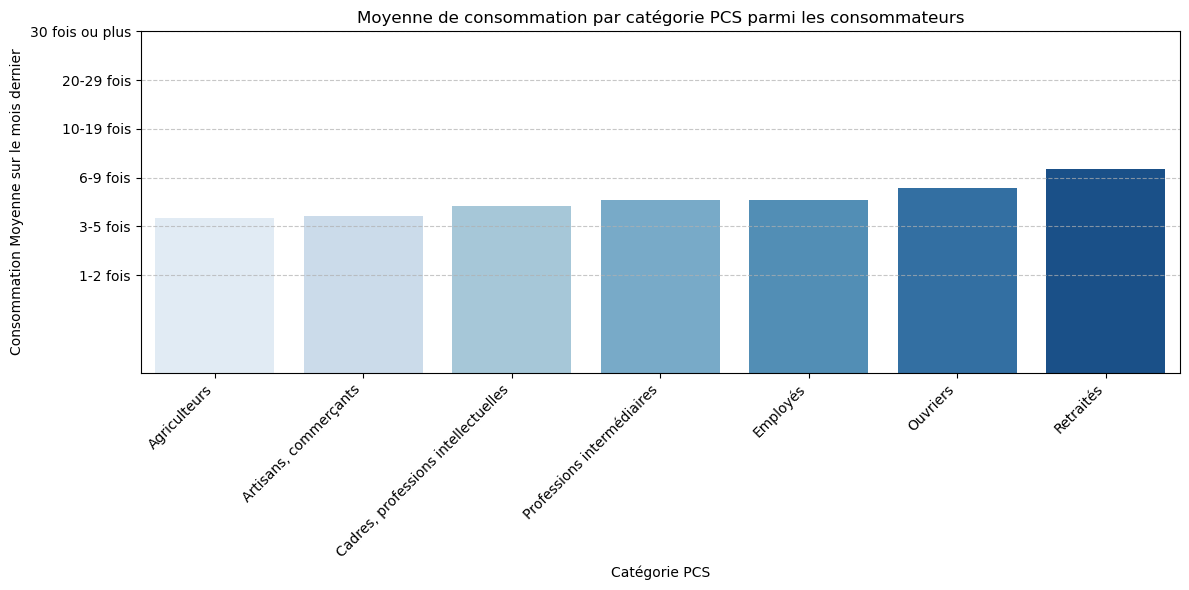

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionnaire de correspondance pour Q42
mapping = {
    1: "0 fois",
    2: "1-2 fois",
    3: "3-5 fois",
    4: "6-9 fois",
    5: "10-19 fois",
    6: "20-29 fois",
    7: "30 fois ou plus"
}

# Dictionnaire de correspondance pour PCSMEN
pcs_mapping = {
    1: "Agriculteurs",
    2: "Artisans, commerçants",
    3: "Cadres, professions intellectuelles",
    4: "Professions intermédiaires",
    5: "Employés",
    6: "Ouvriers",
    7: "Retraités",
    8: "Sans activité professionnelle"
}

# Exclure les 0 fois (1 dans Q42)
df_filtered = df[df["Q42"] != 1]

# Calculer la moyenne de consommation par PCS
moyenne_par_pcs = df_filtered.groupby("PCSMEN")["Q42"].mean().reset_index()

# Remplacer les codes PCSMEN par les labels
moyenne_par_pcs["PCSMEN"] = moyenne_par_pcs["PCSMEN"].map(pcs_mapping)

# Graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=moyenne_par_pcs, x="PCSMEN", y="Q42", palette="Blues")
plt.xticks(rotation=45, ha='right')

# Modifier les labels de l'axe Y
plt.yticks(ticks=range(2, 8), labels=[mapping[i] for i in range(2, 8)])

plt.title("Moyenne de consommation par catégorie PCS parmi les consommateurs")
plt.xlabel("Catégorie PCS")
plt.ylabel("Consommation Moyenne sur le mois dernier")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




In [12]:
# Liste des colonnes à sélectionner
colonnes_selectionnees = [
    "QC06A1", "QC06A2", "QC06A3",
    "QC06B1", "QC06B2", "QC06B3",
    "QC06C1", "QC06C2", "QC06C3",
    "QC06D1", "QC06D2", "QC06D3",
    "QC06E1", "QC06E2", "QC06E3",
    "QC06F1", "QC06F2", "QC06F3"
]

# Sélectionner les colonnes et retirer les non-réponses
df_selectionne = df[colonnes_selectionnees].dropna(how='all')

# Appliquer la transformation
df_selectionne = df_selectionne.replace({1: 0, 2: 1})

# Afficher les premières lignes pour vérifier
df_selectionne.head()


,QC06A1,QC06A2,QC06A3,QC06B1,QC06B2,QC06B3,QC06C1,QC06C2,QC06C3,QC06D1,QC06D2,QC06D3,QC06E1,QC06E2,QC06E3,QC06F1,QC06F2,QC06F3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
import statsmodels.api as sm

# Variables indépendantes : Colonnes sélectionnées
X = df[colonnes_selectionnees].replace({1: 0, 2: 1}).fillna(0)

# Variable dépendante : q42reg (en s'assurant qu'elle est binaire)
y = df['q42reg'].fillna(0)

# Ajouter une constante pour le modèle
X = sm.add_constant(X)

# Modèle Logit
logit_model = sm.Logit(y, X).fit()

# Résumé du modèle
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.151738
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 q42reg   No. Observations:                22430
Model:                          Logit   Df Residuals:                    22411
Method:                           MLE   Df Model:                           18
Date:                Fri, 16 May 2025   Pseudo R-squ.:                 0.01978
Time:                        16:10:56   Log-Likelihood:                -3403.5
converged:                       True   LL-Null:                       -3472.2
Covariance Type:            nonrobust   LLR p-value:                 2.094e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3576      0.039    -86.981      0.000      -3.433      -3.282
QC06A1         0.0085      0.

regression de se faire agresser ou agresser sur consommation régulière. 

On ne garde que se faire agresser école ou autre lieux (maison par exemple)

In [7]:
import statsmodels.api as sm

colonnes_selectionnees = [
    "QC06A3",
    "QC06C3",
    "QC06D2", "QC06D3",
    "QC06E1", "QC06E2", "QC06E3",
    "QC06F1", "QC06F2"
]
# Variables indépendantes : Colonnes sélectionnées
X = df[colonnes_selectionnees].replace({1: 0, 2: 1}).fillna(0)

# Variable dépendante : q42reg (en s'assurant qu'elle est binaire)
y = df['q42reg'].fillna(0)

# Ajouter une constante pour le modèle
X = sm.add_constant(X)

# Modèle Logit
logit_model = sm.Logit(y, X).fit()

# Résumé du modèle
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.152038
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 q42reg   No. Observations:                22430
Model:                          Logit   Df Residuals:                    22420
Method:                           MLE   Df Model:                            9
Date:                Fri, 16 May 2025   Pseudo R-squ.:                 0.01784
Time:                        17:31:24   Log-Likelihood:                -3410.2
converged:                       True   LL-Null:                       -3472.2
Covariance Type:            nonrobust   LLR p-value:                 2.157e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3684      0.038    -88.636      0.000      -3.443      -3.294
QC06A3         0.4416      0.

Être à l'origine de comportement violent (de D2 à F2) sont favorable à la consommation de cannabis régulièrement. 
On regarde si les contrôles suivent les mêmes types personnes. 

In [9]:
colonnes_selectionnees = [
    "QC06D2", "QC06D3",
    "QC06E1", "QC06E2", "QC06E3",
    "QC06F1", "QC06F2"
]
# Variables indépendantes : Colonnes sélectionnées
X = df[colonnes_selectionnees].replace({1: 0, 2: 1}).fillna(0)

# Variable dépendante : q42reg (en s'assurant qu'elle est binaire)
y = df['QC10'].apply(lambda x: 1 if x == 2 or x == 3 else 0).fillna(0)

# Ajouter une constante pour le modèle
X = sm.add_constant(X)

# Modèle Logit
logit_model = sm.Logit(y, X).fit()

# Résumé du modèle
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.008331
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                   QC10   No. Observations:                22430
Model:                          Logit   Df Residuals:                    22422
Method:                           MLE   Df Model:                            7
Date:                Fri, 16 May 2025   Pseudo R-squ.:                  0.1822
Time:                        17:41:00   Log-Likelihood:                -186.87
converged:                       True   LL-Null:                       -228.49
Covariance Type:            nonrobust   LLR p-value:                 3.005e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3202      0.259    -28.249      0.000      -7.828      -6.812
QC06D2         0.3192      0

Le seul variable remarquable est QC06F1, qui correspond au bagarre de rue, ce qui paraît logique car c'est une variable observable pour les policiers. (arrestation de délinquance qui mène aux cannabis)

In [ ]:
import numpy as np

# Transformation de Q20 : 5, 6, 7, 8 → 0, le reste → 1 (sport par semaine )
df['Q20_bin'] = df['Q20'].apply(lambda x: 0 if x in [5, 6, 7, 8] else 1)

# Transformation de Q07 : 1 → 0, 2 → 1 (redoublement)
df['Q07_bin'] = df['Q07'].apply(lambda x: 0 if x == 1 else (1 if x == 2 else np.nan))

# Créer X avec les variables transformées
X = df[['Q20_bin', 'Q07_bin']].fillna(0)

# Variable cible (y) : q42reg
y = df['q42reg'].fillna(0)

# Ajouter une constante
X = sm.add_constant(X)

# Modèle Logit
logit_model = sm.Logit(y, X).fit()

# Résumé des résultats
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.153419
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 q42reg   No. Observations:                22430
Model:                          Logit   Df Residuals:                    22427
Method:                           MLE   Df Model:                            2
Date:                Fri, 16 May 2025   Pseudo R-squ.:                0.008921
Time:                        17:52:32   Log-Likelihood:                -3441.2
converged:                       True   LL-Null:                       -3472.2
Covariance Type:            nonrobust   LLR p-value:                 3.532e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2176      0.057    -56.239      0.000      -3.330      -3.105
Q20_bin       -0.3236      0.